In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Proyecto Analítica'
%cd '/content/drive/MyDrive/Proyecto Analítica'

ls: cannot access '/content/drive/MyDrive/Proyecto Analítica': No such file or directory
[Errno 2] No such file or directory: '/content/drive/MyDrive/Proyecto Analítica'
/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  Copia del dataset inicial


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


wat = pd.read_csv("wat.csv", sep=';', decimal=',')
dataset=wat.copy()


Object to datetime y creación de columnas "Year", "Month", "Day", "yyyymm"

In [6]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])

dataset['Year'] = pd.DatetimeIndex(dataset['Order Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Order Date']).month
dataset['Day'] = pd.DatetimeIndex(dataset['Order Date']).day
dataset['yyyymm'] = dataset.apply(lambda x: ''.join((str(x['Year']),str(x['Month']))),axis=1)
dataset['yyyymm'] = dataset['yyyymm'].astype(int)

df_sales_by_months = dataset[['Category','Year','Month','Sales']].groupby(['Category','Year','Month'],as_index=False).sum()
df_sales_by_months.head()
dataset.head()

,Row ID,Order Date,Ship Date,Country,State,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,yyyymm
0,1,2016-08-11,11/11/2016,United States,Kentucky,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8,11,20168
1,2,2016-08-11,11/11/2016,United States,Kentucky,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8,11,20168
2,3,2016-12-06,16/6/2016,United States,California,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12,6,201612
3,4,2015-11-10,18/10/2015,United States,Florida,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,10,201511
4,5,2015-11-10,18/10/2015,United States,Florida,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11,10,201511


Cuenta valores nulos

In [7]:
dataset.isnull().sum()

Row ID          0
Order Date      0
Ship Date       0
Country         0
State           0
Product ID      0
Category        0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Year            0
Month           0
Day             0
yyyymm          0
dtype: int64

Total de ventas por categoría, relación de variables



In [8]:
df_sales_by_category = dataset[['Category','Sales']].groupby(['Category'],as_index=False).sum() 
df_sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


Barplot para visualizar resultados gráficos 

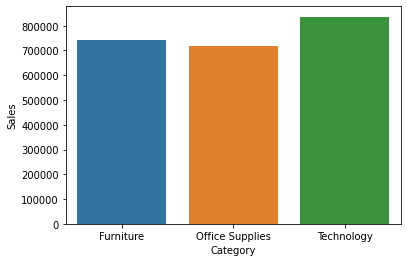

In [9]:
sns.barplot(data=df_sales_by_category, x="Category", y="Sales")
plt.show()

Total Ventas por año

In [10]:
df_sales_by_year = dataset[['Year','Sales']].groupby(['Year'],as_index=False).sum()
df_sales_by_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


Graficamos las ventas en función de los años

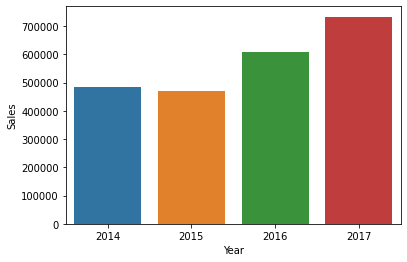

In [11]:
sns.barplot(data=df_sales_by_year, x="Year", y="Sales")
plt.show()

In [12]:
df_sales_by_month = dataset[['Month','Sales']].groupby(['Month'],as_index=False).sum()
df_sales_by_month.head(3)

,Month,Sales
0,1,161083.5874
1,2,132721.3594
2,3,220064.6460


In [13]:
df_sales_by_year_and_month = dataset[['Year','Month','Sales']].groupby(['Year','Month'],as_index=False).sum()
df_sales_by_year_and_month.head(3)

,Year,Month,Sales
0,2014,1,28953.706
1,2014,2,12743.108
2,2014,3,54801.906


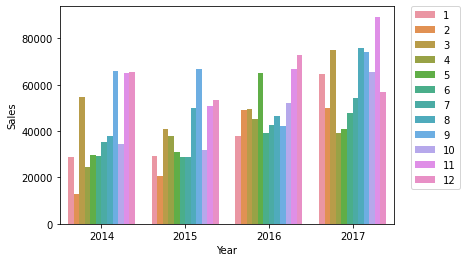

In [14]:
sns.color_palette("husl", 9)
sns.barplot(data=df_sales_by_year_and_month, x="Year", y="Sales", hue="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

In [15]:
df_sales_by_category_and_year = dataset[['Year','Category','Sales']].groupby(['Year','Category'],as_index=False).sum()
df_sales_by_category_and_year.head(3)

,Year,Category,Sales
0,2014,Furniture,157192.8531
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330


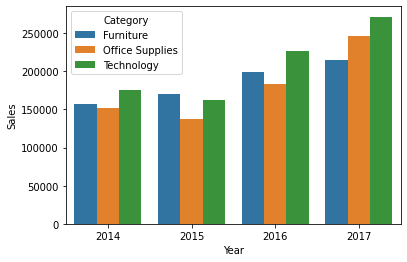

In [16]:
sns.barplot(data=df_sales_by_category_and_year, x="Year", y="Sales", hue="Category")

In [17]:
df_aux = dataset[['Year','Month','yyyymm','Day','Category','Sales']].groupby(['Year','Month','yyyymm','Day','Category'],as_index=False).sum()
df_aux

,Year,Month,yyyymm,Day,Category,Sales
0,2014,1,20141,2,Technology,468.900
1,2014,1,20141,3,Furniture,1893.995
2,2014,1,20141,3,Office Supplies,303.216
3,2014,1,20141,3,Technology,5.940
4,2014,1,20141,4,Office Supplies,119.888
...,...,...,...,...,...,...
2856,2017,12,201712,29,Office Supplies,282.440
2857,2017,12,201712,29,Technology,302.376
2858,2017,12,201712,30,Furniture,323.136
2859,2017,12,201712,30,Office Supplies,299.724


In [18]:
df_final = df_aux.loc[((df_aux['Year']==2014)&(df_aux['Month']==11)&(df_aux['Day']==28))|
                       ((df_aux['Year']==2015)&(df_aux['Month']==11)&(df_aux['Day']==27))|
                       ((df_aux['Year']==2016)&(df_aux['Month']==11)&(df_aux['Day']==25))|
                       ((df_aux['Year']==2017)&(df_aux['Month']==11)&(df_aux['Day']==24)),
                       ['Year','Month','yyyymm','Category','Sales']
                       ]
df_final

,Year,Month,yyyymm,Category,Sales
585,2014,11,201411,Furniture,808.9320
586,2014,11,201411,Office Supplies,333.1180
587,2014,11,201411,Technology,1138.7800
1230,2015,11,201511,Furniture,1315.3955
1231,2015,11,201511,Office Supplies,404.7700
1232,2015,11,201511,Technology,1389.6180
1964,2016,11,201611,Furniture,1762.9620
1965,2016,11,201611,Office Supplies,1115.7280
1966,2016,11,201611,Technology,5099.8610
2773,2017,11,201711,Furniture,1734.0280


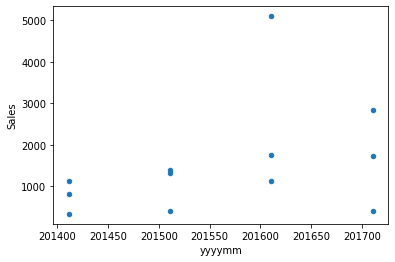

In [19]:
df_final.plot(kind="scatter", x="yyyymm", y="Sales")

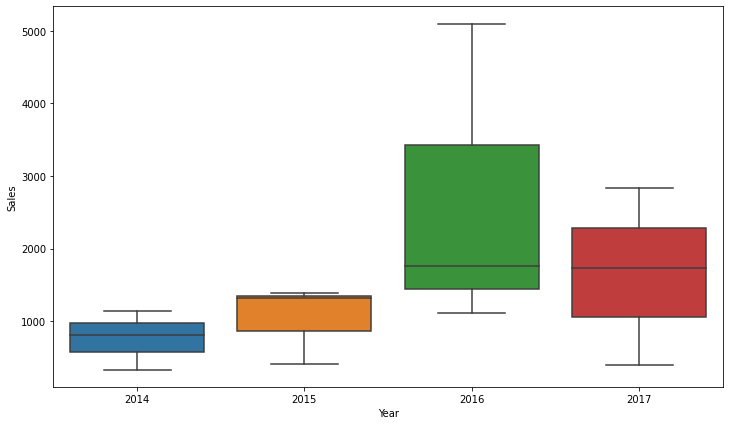

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Year',y='Sales',data=df_final)
plt.show()

## Regresion lineal

In [21]:
df_final.dtypes

Year          int64
Month         int64
yyyymm        int64
Category     object
Sales       float64
dtype: object

In [22]:
from sklearn.preprocessing import OrdinalEncoder

cat = df_final[["Category"]]

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
print(len(cat))
housing_cat_1hot = cat_encoder.fit_transform(cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

12


[array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)]

In [24]:
df_dyummys = pd.DataFrame(housing_cat_1hot.toarray())
df_dyummys.columns = ['Furniture', 'Office Supplies', 'Technology']
df_dyummys
df_final_dummys = pd.concat([df_final.reset_index(drop=True), df_dyummys.reset_index(drop=True)], axis=1)
df_final_dummys.pop('Category')
df_final_dummys

,Year,Month,yyyymm,Sales,Furniture,Office Supplies,Technology
0,2014,11,201411,808.9320,1.0,0.0,0.0
1,2014,11,201411,333.1180,0.0,1.0,0.0
2,2014,11,201411,1138.7800,0.0,0.0,1.0
3,2015,11,201511,1315.3955,1.0,0.0,0.0
4,2015,11,201511,404.7700,0.0,1.0,0.0
5,2015,11,201511,1389.6180,0.0,0.0,1.0
6,2016,11,201611,1762.9620,1.0,0.0,0.0
7,2016,11,201611,1115.7280,0.0,1.0,0.0
8,2016,11,201611,5099.8610,0.0,0.0,1.0
9,2017,11,201711,1734.0280,1.0,0.0,0.0


# Aca se hace la correlación

In [25]:
corr_matrix = df_final_dummys.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales              1.000000
yyyymm             0.377869
Year               0.377869
Technology         0.265462
Furniture         -0.067817
Office Supplies   -0.197645
Month                   NaN
Name: Sales, dtype: float64

In [26]:
df_sales_by_year = dataset[['Year','Sales']].groupby(['Year'],as_index=False).sum()
df_sales_by_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [27]:
df_sales_by_category = dataset[['Category', 'Sales']].groupby(['Category'],as_index=False).sum()
df_sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


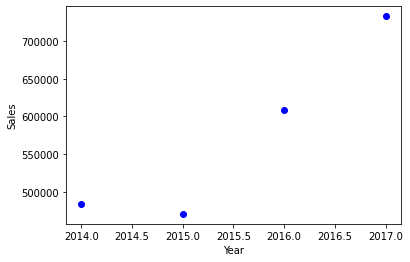

In [28]:
import matplotlib.pyplot as plt

plt.ylabel("Sales")
plt.xlabel("Year")
plt.scatter(df_sales_by_year["Year"], df_sales_by_year["Sales"], color="blue")
plt.show()

# Modelo con mas de una variable

In [29]:
df_model = df_final_dummys[['Year','Technology','Furniture','Office Supplies','Sales']]

In [30]:
x = df_model[['Year','Technology','Furniture','Office Supplies']] 
y = df_model[['Sales']] 


In [31]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

model = regresion.fit(x, y)

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

Intersección (b) [-865486.98646667]
Pendiente (m) [[ 430.17335     477.83129167 -122.07108333 -355.76020833]]


# De aca comienza modelo con una variable

Relacionamos Sales and Year

In [32]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

Modelo con polinomio de grado 1

In [33]:
x = df_sales_by_year["Year"].values.reshape((-1, 1))
y = df_sales_by_year["Sales"].values.reshape((-1, 1)) 

model_1 = regresion.fit(x, y)

print("Intersección (b)", model_1.intercept_)
print("Pendiente (m)", model_1.coef_)

Intersección (b) [-1.77913615e+08]
Pendiente (m) [[88557.63603]]


Predicción del modelo de grado 1

w_1 88557.63603000001
w_2 88557.63603000001
R^2 0.8646662968804718


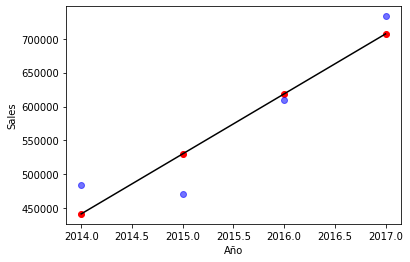

In [34]:
x_p = [[i] for i in range(2014, 2018)]
y_1 = model_1.predict(x_p)

print('w_1', model_1.coef_[0][0])
print('w_2', model_1.coef_[0][0])
print('R^2', model_1.score(x_p, y))


plt.scatter(x_p, y_1, color="red")
plt.plot(x_p, y_1, color="black")

plt.ylabel("Sales")
plt.xlabel("Año")
plt.scatter(df_sales_by_year["Year"], df_sales_by_year["Sales"], color="blue", alpha=0.55)
plt.show()

Modelo con polinomio de grado 2

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2, include_bias = False)
x_2 = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = True)
model_2.fit(x_2, y)

print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
print('R^2', model_2.score(x_2, y))

w_1 -138703454.672787
w_2 34431.16157499801
R^2 0.9692321384683001


Predicción modelo de grado 2

R^2 0.9692321384683001


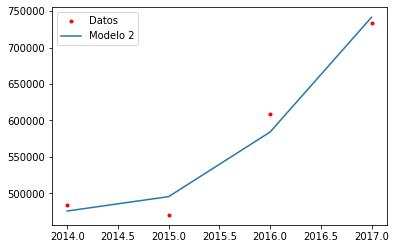

In [36]:
x_p = [[i] for i in range(2014, 2018)]
y_2 = model_2.predict(poly_2.fit_transform(x_p))

plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(x_p, y_2, label = 'Modelo 2')
plt.legend(loc = 2)
print('R^2', model_2.score(x_2, y))
plt.show()


Modelo con polinomio de grado 5

w_1 -29.585952994058584
w_2 -27.661627847879465
R^2 0.999999999999387


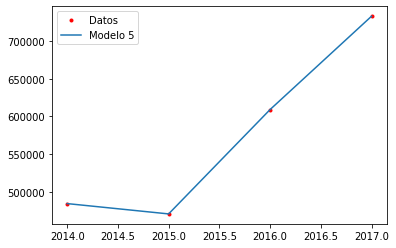

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = True)
model_5.fit(x_5, y)

print('w_1', model_5.coef_[0][0])
print('w_2', model_5.coef_[0][1])
print('R^2', model_5.score(x_5, y))

x_p = [[i] for i in range(2014, 2018)]
y_5 = model_5.predict(poly_5.fit_transform(x_p))

plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(x_p, y_5, label = 'Modelo 5')
plt.legend(loc = 2)
plt.show()

Graficamos los 3 modelos en un mismo eje

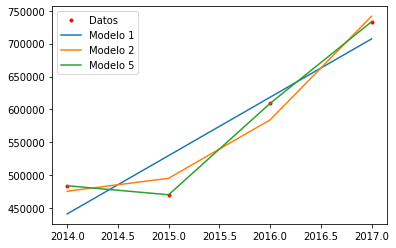

In [38]:
plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(x_p, y_1, label = 'Modelo 1')
plt.plot(x_p, y_2, label = 'Modelo 2')
plt.plot(x_p, y_5, label = 'Modelo 5')
plt.legend(loc = 2)
plt.show()

Predicción valor de ventas para 2018

In [39]:
y_2 = model_2.predict(poly_2.fit_transform([[2018]]))
y_2

array([[967850.11300659]])